# Ideal Tech Investment in American Cities<a name="top"></a>

## Table of Contents

* [Introduction](#introduction)
* [Data Gathering](#datagathering)
* [Methodology](#Methodology)
* [Analysis](#analysis)
* [Results](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It is common knowledge that Silicon Valley is the premier location for all things tech. Thanks to economic agglomeration effects, this is not going to change anytime soon. Despite this, there are a rising number of tech companies, from startups to established titans, along with investors, who are looking for alternatives to Silicon Valley. An example of this is AOL founder Steve Case's Rise of the Rest Fund. Some of these companies are looking to move, while others may just want to open regional locations.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this analysis, I will be looking at the number of tech startups in the top 100 biggest American cities, along with the Zillow home value indexes as a way to gauge cost of living. I will also list the percentage of people with bachelor's degrees or higher, because this industry requires a skilled, educated workforce. I will use this data to try to discover the ideal place to focus investment. Due to the aforementioned agglomeration affects, the ideal place has a high number of tech startups with a low home value index, along with a high percentage of college grads.

## Data Gathering <a name="datagathering"></a>

[Back to Top](#top)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The data souces I will be using are as follows: For the tech startup numbers, I will be using the foursquare api, as linked [here](https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&categoryId={}&near={}). For the housing data, I will be using the zillow home value index, as linked [here](https://www.zillow.com/research/data/). For the college degree numbers, I will be using this [site](https://www.indexmundi.com/facts/united-states/quick-facts/cities/rank/percent-of-people-25-years-and-over-with-bachelors-degree-or-higher).

First, let's go ahead and import all of the needed librairies, along with the code needed to use the foursquare api.

In [2]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

pd.set_option('display.max_rows', None)

In [3]:
# foursquare api info.
CLIENT_ID = 'REDACTED' # Foursquare ID
CLIENT_SECRET = 'REDACTED' # Foursquare Secret
VERSION = 'REDACTED' # Foursquare API version
CATEGORYID = '4bf58dd8d48988d125941735'

Next, lets download the webpage for the college data and create a soup file out of it.  

In [4]:
# Download url and filter out everything but text
url = 'https://www.indexmundi.com/facts/united-states/quick-facts/cities/rank/percent-of-people-25-years-and-over-with-bachelors-degree-or-higher'
data  = requests.get(url).text 

In [5]:
# create soup file out of webpage. 
soup = BeautifulSoup(data,"html5lib")

Let's go ahead and zero in on only the data that we need and put it into a dataframe. That data includes the city name, the state name, and the college degree percentage.

In [6]:
# Narrow in on desired data and remove unwanted characters
college_chart = str(soup.find_all('script')[12]).split('<set label')[1:]

college_chart_clean = []
for index in college_chart:
    clean = index.replace('"', '').replace('=', '').replace('/', '').replace("'", '').replace('>', '').split(' ')
    if len(clean) == 4:
        college_chart_clean.append([clean[0] + ' ' +  clean[1], clean[2].replace('value', '')])
    elif len(clean) == 5:
        college_chart_clean.append([clean[0] + ' ' +  clean[1] + ' ' + clean[2], clean[3].replace('value', '')])
    else:
        college_chart_clean.append([clean[0], clean[1].replace('value', '')])

In [7]:
# Split the college_chart data into lists of cities and degree percentage values
city_list = []
degree_list = []
for index in college_chart_clean:
    city_list.append(index[0])
    degree_list.append(index[1])

In [8]:
# Create list of states to go along with other data. Due to multiple towns with same names, manual entry was required.
state_list = ['CA','WA','WI','DC','AZ','CA','TX','CA','TX','NC','GA','MN',
              'OR','NC','MA','CO','NJ','CA','AZ','AZ','NC','PA','CA','CA',
              'ID','MN','CO','NE','VA','IL','NC','NY','FL','LA','FL','NE',
              'HI','TX','OH','OH','AK','VA','MO','NM','FL','MO','CA','LA',
              'NV','CA','VA','NV','TX','TX','MD','OK','CA','WA','TX','OK',
              'KS','VA','CO','CA','TX','PA','WA','AZ','VA','FL','FL','IN',
              'AZ','NY','AZ','TX','IA','TN','CA','TX','WI','NV','TX','CA',
              'TX','CA','CA','AZ','TX','CA','OH','CA','CA','NV','OH','NJ',
              'MI','FL','CA','CA']

In [9]:
# create dataframe 
investor_data = pd.DataFrame(columns = ['City', 'State', 'HomePrice', 'StartupNumber', 'DegreePercent'])

In [10]:
# Add lists of city names, degree percentage values, and states to dataframe.
investor_data['City'] = city_list
investor_data['DegreePercent'] = degree_list
investor_data['State'] = state_list

In [11]:
# read data on cities and metropolitan areas into seperate dataframes.
metro_data = pd.read_csv('Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
city_data = pd.read_csv('City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

In [12]:
metro_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,102001,0,United States,Country,NaN,106948.0,106975.0,107025.0,107151.0,107293.0,...,251561.0,252808.0,254322.0,256273.0,258554.0,261062.0,263778.0,266596.0,269440.0,272446.0
1,394913,1,"New York, NY",Msa,NY,187450.0,187013.0,186734.0,186202.0,185885.0,...,485001.0,486825.0,489253.0,492450.0,496604.0,501301.0,506351.0,511230.0,515876.0,520587.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,187876.0,188138.0,188158.0,188268.0,188241.0,...,706656.0,707939.0,712420.0,719736.0,727484.0,734401.0,741356.0,748439.0,755007.0,761635.0
3,394463,3,"Chicago, IL",Msa,IL,163550.0,163249.0,162853.0,162403.0,161800.0,...,246198.0,246846.0,248003.0,249557.0,251649.0,253978.0,256316.0,258626.0,260645.0,263185.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,111771.0,111834.0,111994.0,112314.0,112658.0,...,258447.0,259779.0,261345.0,263147.0,265016.0,267474.0,269998.0,272884.0,275201.0,278259.0


In [13]:
city_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,191446.0,190894.0,...,639311.0,640784.0,641740.0,643737.0,645612.0,647736.0,649650.0,651034.0,651760.0,652012.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,188876.0,188852.0,...,768499.0,770044.0,776414.0,785359.0,795471.0,802848.0,809506.0,815031.0,820354.0,826566.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,93995.0,94111.0,...,194393.0,195129.0,195991.0,197011.0,198710.0,200396.0,202549.0,204655.0,207072.0,209512.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,139347.0,139191.0,...,266975.0,267945.0,269615.0,271612.0,274294.0,276976.0,279301.0,281388.0,283045.0,285579.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,96139.0,96105.0,...,192132.0,192622.0,193484.0,194590.0,196002.0,197720.0,199522.0,201477.0,203432.0,205742.0


In [14]:
investor_data.head()

,City,State,HomePrice,StartupNumber,DegreePercent
0,Irvine,CA,NaN,NaN,68.50
1,Seattle,WA,NaN,NaN,62.80
2,Madison,WI,NaN,NaN,57.90
3,Washington,DC,NaN,NaN,57.60
4,Scottsdale,AZ,NaN,NaN,57.20


Now, we remove columns that we will not be needing

In [15]:
# Retain only needed columns and put them into updated dataframe.
metro_data_slim = metro_data[['RegionName', 'StateName', '2021-02-28']]
city_data_slim = city_data[['RegionName', 'StateName', 'Metro']]

In [16]:
city_data_slim.head(2)

,RegionName,StateName,Metro
0,New York,NY,New York-Newark-Jersey City
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim


We will now create a column that contains the metropolitan area that the city is apart of.

In [17]:
# Create list of metro areas for corresponding cities by matching metro names to towns and states.
metro_list = []
for i_index in range(investor_data.shape[0]):
    i_city = investor_data.loc[i_index]['City']
    i_state = investor_data.loc[i_index]['State']
    metro = city_data_slim.loc[(city_data_slim['RegionName'] == i_city) & (city_data_slim['StateName'] == i_state)]['Metro']
    metro_list.append(str(metro.values).replace('[', '').replace(']', '').replace("'", ''))

In [18]:
# Add list of metro areas to dataframe.
investor_data['Metro'] = metro_list

In [19]:
# Manually add metro areas to rows that tripped up algorithm for one reason or another
investor_data.loc[24, 'Metro'] = investor_data.loc[24, 'Metro'].replace('', 'Boise City')
investor_data.loc[24, 'City'] = investor_data.loc[24, 'City'].replace('Boise City', 'Boise')
investor_data.loc[25, 'Metro'] = investor_data.loc[25, 'Metro'].replace('', 'Minneapolis–Saint Paul')
investor_data.loc[36, 'Metro'] = investor_data.loc[36, 'Metro'].replace('', 'Honolulu')
investor_data.loc[36, 'City'] = investor_data.loc[36, 'City'].replace('Urban Honolulu', 'Honolulu')
investor_data.loc[42, 'Metro'] = investor_data.loc[42, 'Metro'].replace('', 'St. Louis, MO-IL')
investor_data.loc[44, 'Metro'] = investor_data.loc[44, 'Metro'].replace('', 'Tampa–St. Petersburg–Clearwater')

We will also create a columns containing the zillow home index values for the metro areas.

In [20]:
# Create a list of housing costs for each metro area.
house_list = []
for row in range(investor_data.shape[0]):
    i_city = investor_data.loc[row]['City']
    i_state = investor_data.loc[row]['State']
    m_metro = metro_data_slim['RegionName']
    house_cost = metro_data_slim.loc[(m_metro.str.contains(i_city)) & (m_metro.str.contains(i_state))]['2021-02-28']
    house_list.append(str(house_cost.values).replace('[', '').replace(']', '').replace("'", '').replace(".", ''))

In [21]:
# Add housing data to the dataframe
investor_data['HomePrice'] = house_list

In [22]:
metro_data_slim.head()

,RegionName,StateName,2021-02-28
0,United States,NaN,272446.0
1,"New York, NY",NY,520587.0
2,"Los Angeles-Long Beach-Anaheim, CA",CA,761635.0
3,"Chicago, IL",IL,263185.0
4,"Dallas-Fort Worth, TX",TX,278259.0


In [23]:
# Add 'HomePrice' values to rows that tripped up the algorithm for one reason or another
home_index = investor_data.query('HomePrice == ""').index.tolist()
blank_metro = investor_data.query('HomePrice == ""')['Metro'].tolist()
blank_state = investor_data.query('HomePrice == ""')['State'].tolist()

for index, metro, state in zip(home_index, blank_metro, blank_state):
    metro_slice = metro[0:4]
    price = str(metro_data_slim.loc[(metro_data_slim['RegionName'].str.contains(metro_slice))
                                   &(metro_data_slim['StateName'] == state)]['2021-02-28'].values)
    investor_data.loc[index, 'HomePrice'] = investor_data.loc[index, 'HomePrice'].replace(investor_data.loc[index,'HomePrice'],
                                                                                          price[1:-2])

# ones that above for loop didn't work for
investor_data.loc[16, 'HomePrice'] = investor_data.loc[16, 'HomePrice'].replace(investor_data.loc[16,'HomePrice'], '520587')
investor_data.loc[61, 'HomePrice'] = investor_data.loc[61, 'HomePrice'].replace(investor_data.loc[61,'HomePrice'], '483254')
investor_data.loc[95, 'HomePrice'] = investor_data.loc[95, 'HomePrice'].replace(investor_data.loc[95,'HomePrice'], '520587')
investor_data.loc[7, 'HomePrice'] = investor_data.loc[7, 'HomePrice'].replace(investor_data.loc[7,'HomePrice'], '1192921')
investor_data.loc[63, 'HomePrice'] = investor_data.loc[63, 'HomePrice'].replace(investor_data.loc[63,'HomePrice'], '702933')
investor_data.loc[23, 'HomePrice'] = investor_data.loc[23, 'HomePrice'].replace(investor_data.loc[23,'HomePrice'], '1192921')

Now, Lets use the foursquare api to collect the number of tech startups for each city and add them to the dataframe.

In [24]:
# Create list that contains the number of tech startups for each city.
tech_numbers = []
for index in range(investor_data.shape[0]):
    city = investor_data.loc[index]['City']
    state = investor_data.loc[index]['State']
    NEAR = city + ', ' + state
    tech_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&categoryId={}&near={}'.format(
                     CLIENT_ID, 
                     CLIENT_SECRET, 
                     VERSION,
                     CATEGORYID,
                     NEAR)
    tech_results = requests.get(tech_url).json()['response']['totalResults']
    tech_numbers.append(tech_results)

In [25]:
# Add tech numbers list to dataframe
investor_data['StartupNumber'] = tech_numbers

In [26]:
# Convert 'HomePrice' and 'DegreePercent' dataframes from string to int and float, respectfully.
investor_data['HomePrice'] = investor_data['HomePrice'].astype(int)
investor_data['DegreePercent'] = investor_data['DegreePercent'].astype(float)

## Methodology<a name="methodology"></a>

[Back to Top](#top)

During this analysis, We will take a look at each feature at the minumum desired level, then try to to combine them to find the cream of the crop. Those desired levels are as follows:

* A zillow home index value of less than 400k dollars. The zillow home index is a value that is obtained by taking those homes whose price falls above the 35th percentile and below the 65th percentile and finding the median. In other words, they cut out the least and most expensive homes and take the median of what remains. This value is for homes that are in the metropolitan areas of the target cities. Most people are willing to travel some ways to get to work.

* Cities with at least a hundred startups. City population doesn't really matter here beacuse those startups are sufficient to create a tech culture regardless.

* A city where at least 45% of the people have bachelor's degrees.

## Analysis <a name="analysis"></a>

In [27]:
# Create function to plot variations of this dataset
def plot_invest(df):
    plt.scatter(data = df, x = 'StartupNumber', y = 'HomePrice', c = 'DegreePercent')
    plt.xlabel('Number of Startups')
    plt.ylabel('Zillow Home Index')
    plt.ticklabel_format(style = 'plain')
    cbar = plt.colorbar()
    cbar.set_label('Percent with College Degrees')
    plt.title('Number of Startups Per City by College Degree Percentage and the Zillow Home Value Index');

Let's start by taking stock of all the data. We will do this by putting the entire dataframe into a scatterplot.

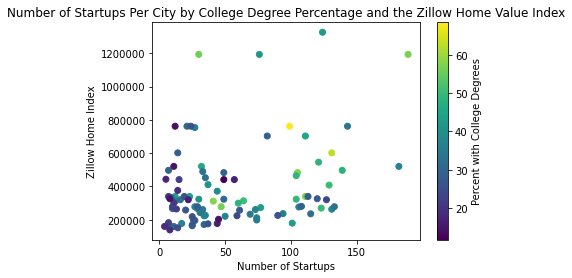

In [28]:
plot_invest(investor_data)

To get a feel for the upsides and downsides of each, lets look at the cities that have 1 aspect of the features that we are looking for. We will start with lower housing costs.

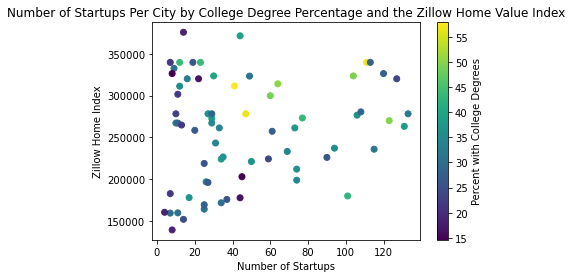

In [29]:
low_house = investor_data[investor_data['HomePrice'] < 400000]

plot_invest(low_house)

Lets move on to cities with high levels of college graduates.

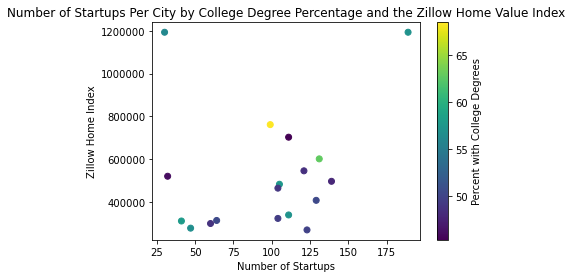

In [30]:
high_degree = investor_data[investor_data['DegreePercent'] >= 45]

plot_invest(high_degree)

Finally, lets look at cities with high startup numbers. 

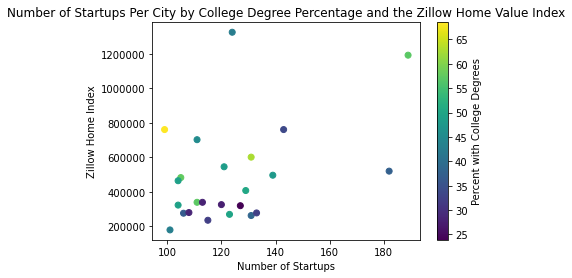

In [31]:
high_startup = investor_data[investor_data['StartupNumber'] >= 99]

plot_invest(high_startup)

Now that we have looked at each on it's own, lets try looking at cities that have all of the traits that we desire.

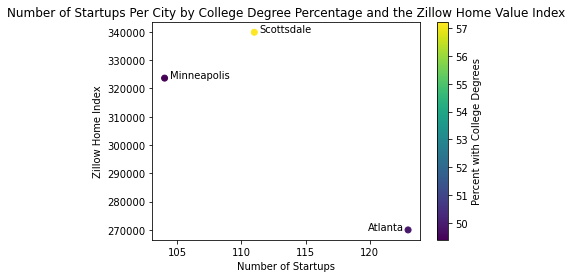

In [32]:
ideal_invest = investor_data[(investor_data['StartupNumber'].between(99, 200)) & 
                             (investor_data['HomePrice'].between(0, 400000)) &
                             (investor_data['DegreePercent'].between(44, 100))]

city_label = ideal_invest['City'].values.tolist()
x = ideal_invest['StartupNumber'].values.tolist()
y = ideal_invest['HomePrice'].values.tolist()

plt.scatter(data = ideal_invest, x = 'StartupNumber', y = 'HomePrice', c = 'DegreePercent')
plt.xlabel('Number of Startups')
plt.ylabel('Zillow Home Index')
plt.ticklabel_format(style = 'plain')
for i, txt in enumerate(city_label):
    if i == 1:
        plt.annotate(txt, (x[i] - 3.1, y[i]))
    else:
        plt.annotate(txt, (x[i] + 0.4, y[i]))
cbar = plt.colorbar()
cbar.set_label('Percent with College Degrees')
plt.title('Number of Startups Per City by College Degree Percentage and the Zillow Home Value Index');

## Results <a name="results"></a>

[Back to Top](#top)

As expected, most cities are not tech hubs. Most have somewhat lower levels of college graduates, along with lower housing costs and lower startup levels.<br>

Cities with homes that have a median value of less than 400k dollars typically have lower numbers of tech startups. So, while there are many cities in this cluster that have somewhat higher levels of college graduates, the low tech startup levels indicate that they may focus on other industries than tech.<br>

There are fewer cities in the cluster made up of cities that have at least 45% college graduates than the one with lower housing costs. While there are a few here with higher levels of tech startups, they also have higher housing costs. This may indicate that these markets are already hot, and might not unlock the best value for employers or employees.<br>

Some cities that have higher numbers of tech startups tend to have lower housing costs, but they also tend to have a very low percentage of people with college degrees. This might indicate problems recruiting top employees to the city not only because of lack of cultural fit, but because of a possible lack of alternative employment opportunities.<br>

There are 3 cities that have all the features that we desire. Of course, that is only how I see things, so the investor/company could see fit to adjust these levels. They may also assign different weights to these values depending on their own needs. That being said, My personal recommedation would be Atlanta. While it may have a relatively lower level of college graduates than the other 2, the increase in tech startups and the significantly lower cost of housing make it worth it.

## Conclusion <a name="conclusion"></a>

The purpose of this project was to identify alternative American cities that would be a good fit for companies to move or venture funds to invest in. The features that were used to perform this analysis were the number of tech startups in the city, the percentage of adults over 25 with at least a bachelor's degree, and the zillow home value index for the metropolitan area that contains the city. Interested stakeholders may also want to take other things into consideration, such as climate, transportation and cultural amenities. 